# Dataset Description
This section will encompass exploratory and descriptive steps of inspecting the created dataset. 

In [5]:
import os
import matplotlib.pyplot as plt
from anytree import Node, RenderTree

def build_folder_tree(base_path):
    """
    Builds a tree structure using anytree to represent the folder hierarchy.

    Args:
        base_path (str): The root path to start walking the directory structure.
    
    Returns:
        Node: The root node of the tree structure.
    """
    # Create a root node for the tree
    root_name = os.path.basename(base_path.rstrip(os.sep))
    root = Node(root_name)

    # Recursively walk the directory and add nodes
    node_dict = {base_path: root}
    for root_path, dirs, _ in os.walk(base_path):
        parent_node = node_dict[root_path]
        for d in dirs:
            dir_path = os.path.join(root_path, d)
            dir_node = Node(d, parent=parent_node)
            node_dict[dir_path] = dir_node

    return root

def plot_tree_hierarchy(root_node):
    """
    Plots a tree structure using matplotlib.

    Args:
        root_node (Node): The root node of the tree structure.
    """
    # Render the tree hierarchy
    tree_lines = []
    for pre, _, node in RenderTree(root_node):
        tree_lines.append(f"{pre}{node.name}")

    # Display the tree in a Matplotlib figure
    fig, ax = plt.subplots(figsize=(8, len(tree_lines) * 0.5))
    ax.axis('off')
    ax.text(0, 1, '\n'.join(tree_lines), fontsize=10, va="top", family="monospace")
    plt.show()


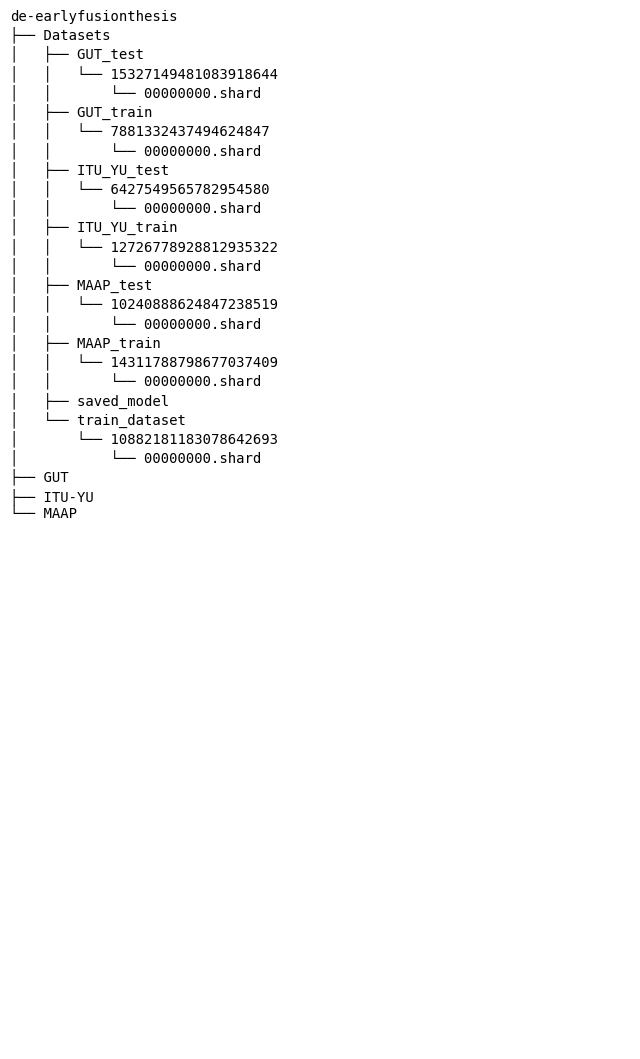

In [6]:
path = r"Z:\IO3-sessions\NEW STRUCTURE\de-earlyfusionthesis"
root_node = build_folder_tree(path)
plot_tree_hierarchy(root_node)

In [11]:
import os

def count_files_by_pattern(base_path, target_dirs, patterns):
    """
    Counts files in the target directories that match specific patterns.

    Args:
        base_path (str): The root directory containing the target subdirectories.
        target_dirs (list of str): List of target directories to search.
        patterns (list of str): List of filename endings to match.

    Returns:
        dict: A dictionary containing counts for each pattern in each directory.
    """
    counts = {dir_name: {pattern: 0 for pattern in patterns} for dir_name in target_dirs}

    for dir_name in target_dirs:
        dir_path = os.path.join(base_path, dir_name)
        if not os.path.exists(dir_path):
            print(f"Directory {dir_path} does not exist. Skipping...")
            continue

        for root, _, files in os.walk(dir_path):
            for file in files:
                for pattern in patterns:
                    if file.endswith(pattern):
                        counts[dir_name][pattern] += 1

    return counts

In [15]:
# Define base path and subdirectories
base_path = r"Z:\IO3-sessions\NEW STRUCTURE\de-earlyfusionthesis"
target_dirs = ["GUT", "ITU-YU", "MAAP"]
patterns = ["input.csv", "BORIS_method_I.csv", "BORIS_method_II.csv", "BORIS.csv"]  # Added "BORIS.csv"

# Perform the file count
file_counts = count_files_by_pattern(base_path, target_dirs, patterns)

# Display the results
for dir_name, pattern_counts in file_counts.items():
    print(f"\nDirectory: {dir_name}")
    for pattern, count in pattern_counts.items():
        print(f"'{pattern[0:-4]}' files count: {count}")



Directory: GUT
'input' files count: 8
'BORIS_method_I' files count: 8
'BORIS_method_II' files count: 8
'BORIS' files count: 8

Directory: ITU-YU
'input' files count: 12
'BORIS_method_I' files count: 12
'BORIS_method_II' files count: 12
'BORIS' files count: 12

Directory: MAAP
'input' files count: 71
'BORIS_method_I' files count: 71
'BORIS_method_II' files count: 71
'BORIS' files count: 71


In [16]:
import os
import re
from collections import defaultdict

def count_cameras_per_session(base_path, target_dirs):
    """
    Counts the number of unique cameras (C) for each session (S) in the target directories.

    Args:
        base_path (str): The root directory containing the target subdirectories.
        target_dirs (list of str): List of target directories to search.

    Returns:
        dict: A dictionary with session counts for each directory.
    """
    session_camera_counts = {dir_name: defaultdict(set) for dir_name in target_dirs}

    # Regular expression to capture session and camera numbers in filenames
    session_camera_pattern = re.compile(r"_S(\d+)_C(\d+)")

    for dir_name in target_dirs:
        dir_path = os.path.join(base_path, dir_name)
        if not os.path.exists(dir_path):
            print(f"Directory {dir_path} does not exist. Skipping...")
            continue

        for root, _, files in os.walk(dir_path):
            for file in files:
                # Search for the session and camera information in the filename
                match = session_camera_pattern.search(file)
                if match:
                    session = match.group(1)  # Extract session number (S)
                    camera = match.group(2)  # Extract camera number (C)
                    session_camera_counts[dir_name][session].add(camera)  # Add camera to the session set

    # Convert sets to counts for each session
    session_camera_counts_final = {dir_name: {session: len(cameras) for session, cameras in sessions.items()}
                                   for dir_name, sessions in session_camera_counts.items()}

    return session_camera_counts_final

In [17]:
# Define base path and subdirectories
base_path = r"Z:\IO3-sessions\NEW STRUCTURE\de-earlyfusionthesis"
target_dirs = ["GUT", "ITU-YU", "MAAP"]

# Perform the camera count
camera_counts = count_cameras_per_session(base_path, target_dirs)

# Display the results
for dir_name, session_counts in camera_counts.items():
    print(f"\nDirectory: {dir_name}")
    for session, count in session_counts.items():
        print(f"  Session {session} cameras count: {count}")



Directory: GUT
  Session 01 cameras count: 3
  Session 02 cameras count: 3
  Session 03 cameras count: 2

Directory: ITU-YU
  Session 01 cameras count: 11
  Session 02 cameras count: 1

Directory: MAAP
  Session 01 cameras count: 9
  Session 02 cameras count: 10
  Session 03 cameras count: 9
  Session 04 cameras count: 9
  Session 05 cameras count: 7
  Session 06 cameras count: 6
  Session 07 cameras count: 6
  Session 08 cameras count: 5
  Session 09 cameras count: 5
  Session 10 cameras count: 4
  Session 11 cameras count: 1


In [32]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Function to count files by regex pattern
def count_files_by_regex(base_path, target_dirs, patterns):
    counts = {dir_name: {pattern: 0 for pattern in patterns} for dir_name in target_dirs}

    # Loop over target directories and their files
    for dir_name in target_dirs:
        dir_path = os.path.join(base_path, dir_name)
        if not os.path.exists(dir_path):
            print(f"Directory {dir_path} does not exist. Skipping...")
            continue

        for root, _, files in os.walk(dir_path):
            for file in files:
                # Check each file against the regex patterns
                for pattern, regex in patterns.items():
                    if re.search(regex, file):
                        counts[dir_name][pattern] += 1

    return counts

# Function to count cameras per session (no changes here)
def count_cameras_per_session(base_path, target_dirs):
    session_camera_counts = {dir_name: defaultdict(set) for dir_name in target_dirs}
    session_camera_pattern = re.compile(r"_S(\d+)_C(\d+)")

    for dir_name in target_dirs:
        dir_path = os.path.join(base_path, dir_name)
        if not os.path.exists(dir_path):
            print(f"Directory {dir_path} does not exist. Skipping...")
            continue

        for root, _, files in os.walk(dir_path):
            for file in files:
                match = session_camera_pattern.search(file)
                if match:
                    session = match.group(1)
                    camera = match.group(2)
                    session_camera_counts[dir_name][session].add(camera)

    session_camera_counts_final = {dir_name: {session: len(cameras) for session, cameras in sessions.items()}
                                   for dir_name, sessions in session_camera_counts.items()}

    return session_camera_counts_final

In [33]:
# Define base path and subdirectories
base_path = r"Z:\IO3-sessions\NEW STRUCTURE\de-earlyfusionthesis"
target_dirs = ["GUT", "ITU-YU", "MAAP"]

# Define regex patterns for each file type
patterns = {
    "BORIS.csv": r"BORIS\.csv$",          # Matches files ending with 'BORIS.csv'
    "method_I.csv": r"method_I\.csv$",    # Matches files ending with 'method_I.csv'
    "method_II.csv": r"method_II\.csv$",  # Matches files ending with 'method_II.csv'
    "input.csv": r"input\.csv$"           # Matches files ending with 'input.csv'
}

# Perform the file type count based on regex patterns
file_counts = count_files_by_regex(base_path, target_dirs, patterns)

# Perform the camera count
camera_counts = count_cameras_per_session(base_path, target_dirs)


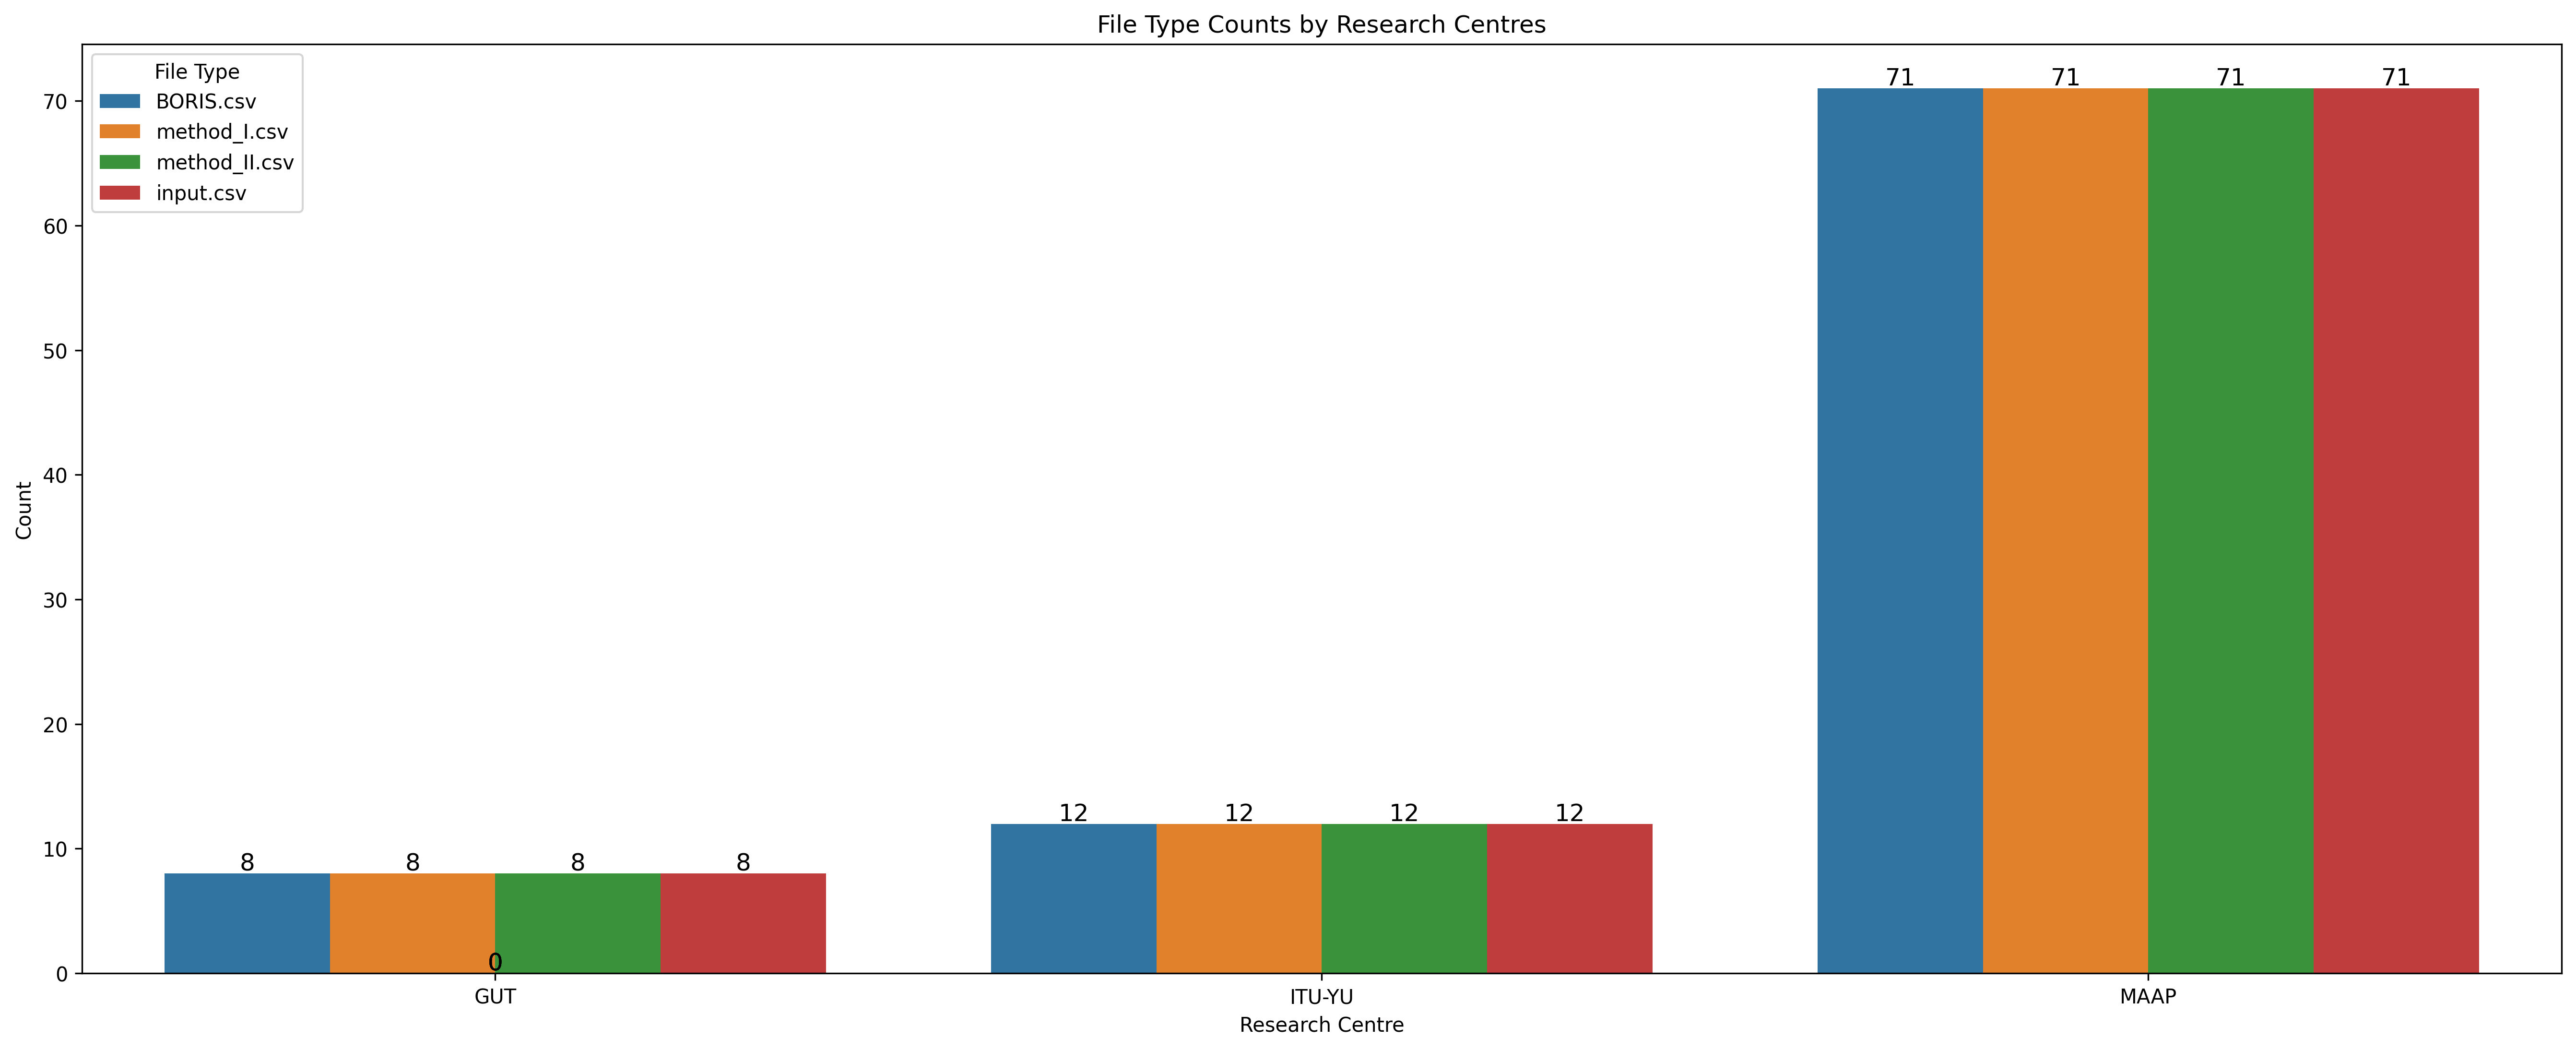

In [34]:
# **File Counts Plot**
# Create the plots and adjust figure size for high resolution
plt.figure(figsize=(18, 14), dpi=300)  # Significantly larger figure for better resolution

# Create a subplot for file counts
plt.subplot(2, 1, 1)
file_data = []
for dir_name, pattern_counts in file_counts.items():
    for pattern, count in pattern_counts.items():
        file_data.append([dir_name, pattern, count])
file_df = pd.DataFrame(file_data, columns=["Research Centre", "File Type", "Count"])

# Plot file counts as a bar plot
ax = sns.barplot(x="Research Centre", y="Count", hue="File Type", data=file_df)
plt.title("File Type Counts by Research Centres")
plt.xlabel("Research Centre")
plt.ylabel("Count")
plt.legend(title="File Type")

# Display counts at the top of bars (as integers)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Display count as integer
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Save the file counts plot as a separate PNG file
plt.tight_layout()
plt.savefig("file_counts_by_directory.png", dpi=300)


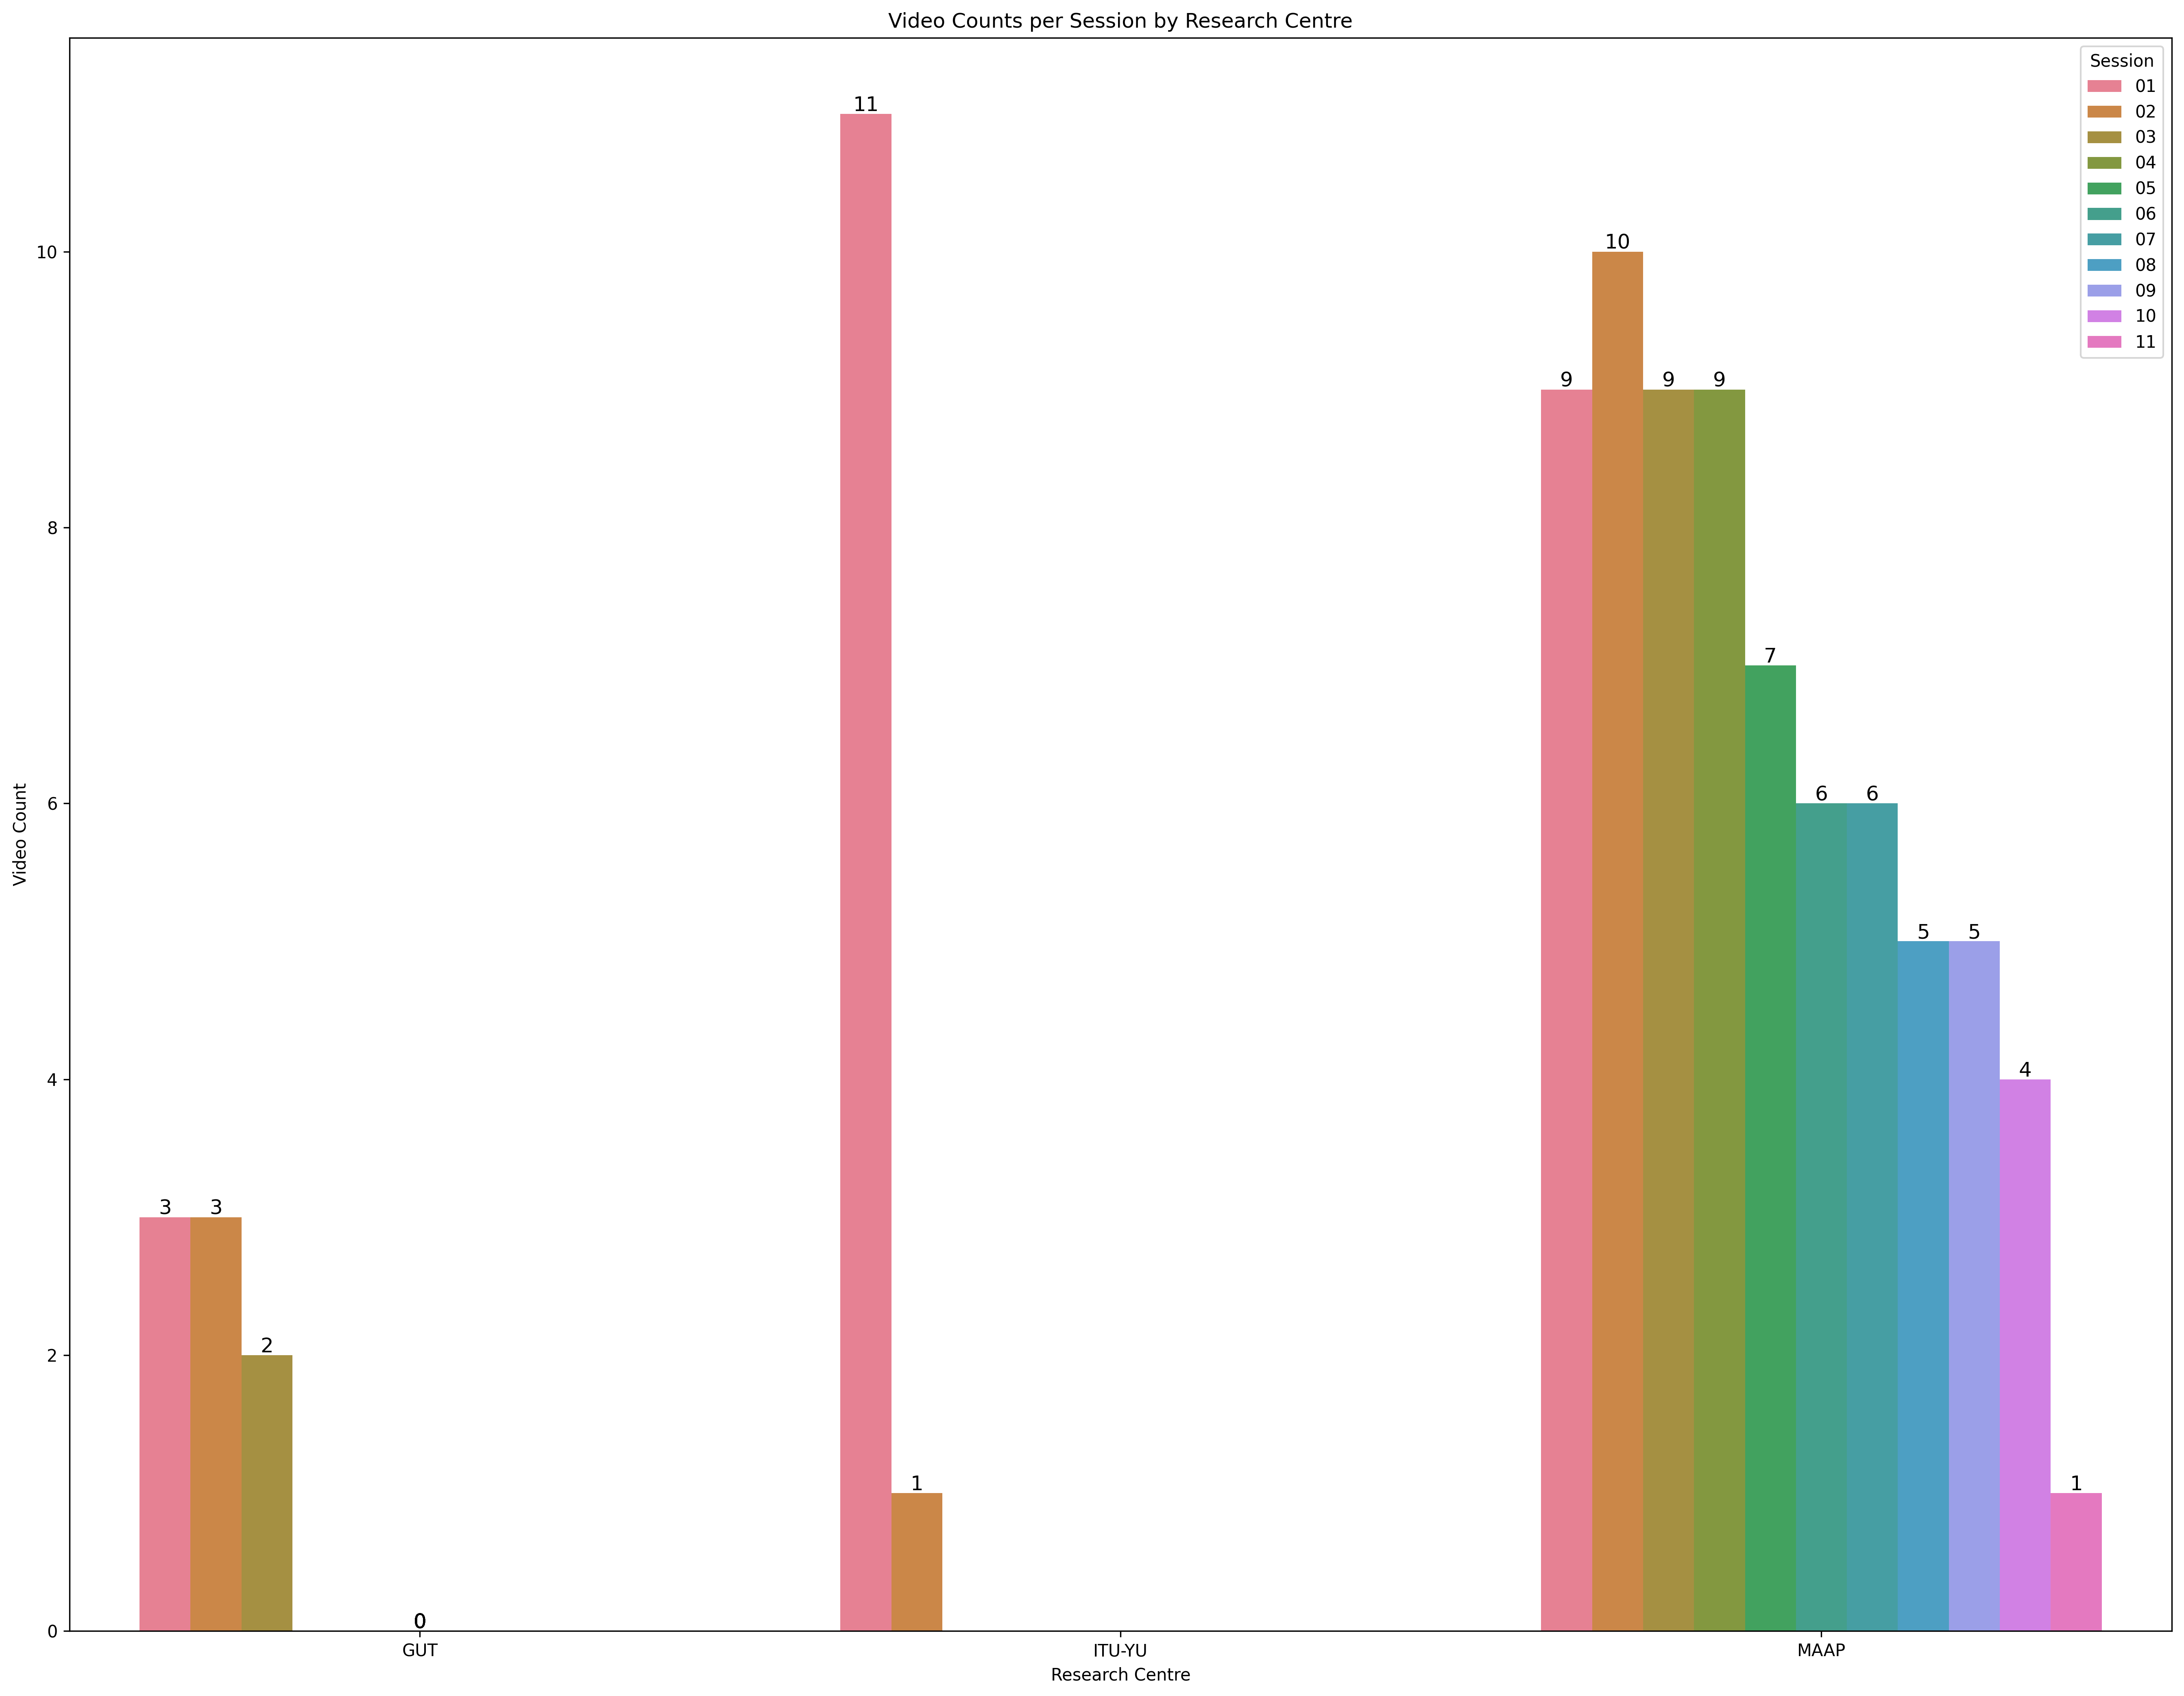

In [35]:
# **Camera Counts Plot**
# Create a subplot for camera counts per session
plt.figure(figsize=(18, 14), dpi=300)  # Larger figure for camera counts plot
camera_data = []
for dir_name, session_counts in camera_counts.items():
    for session, count in session_counts.items():
        camera_data.append([dir_name, session, count])
camera_df = pd.DataFrame(camera_data, columns=["Research Centre", "Session", "Video Count"])

# Plot camera counts as a bar plot
ax2 = sns.barplot(x="Research Centre", y="Video Count", hue="Session", data=camera_df)
plt.title("Video Counts per Session by Research Centre")
plt.xlabel("Research Centre")
plt.ylabel("Video Count")
plt.legend(title="Session")

# Display counts at the top of bars (as integers)
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}',  # Display count as integer
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 fontsize=12, color='black',
                 xytext=(0, 5), textcoords='offset points')

# Save the camera counts plot as a separate PNG file
plt.tight_layout()
plt.savefig("camera_counts_per_session.png", dpi=300)

# Show the figures
plt.show()
